[EDA](eda.ipynb)

# Modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  QuantileTransformer
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error,r2_score

Load in the data

In [2]:
X_e = pd.read_csv('data/X_engineered.csv')
X_s = pd.read_csv('data/X_straight.csv')
y = pd.read_csv('data/y.csv').mpg

Transform it, QuantileTransformer works best in my testing

In [3]:
qt = QuantileTransformer(n_quantiles=297)
qt_eng = qt.fit_transform(X_e)
qt_str = qt.fit_transform(X_s)

In [4]:
def run(X,y,model_type):
    r2_test_list = []
    r2_train_list = []
    rmse_test_list = []
    rmse_train_list = []
    
    for i in range(201):
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        
        model = model_type.fit(X_train,y_train)
        test_predict = model.predict(X_test)
        train_predict = model.predict(X_train)
        
        r2_test = r2_score(y_test, test_predict)
        r2_train = r2_score(y_train, train_predict)
        rmse_test = mean_squared_error(y_test, test_predict ,squared=False)
        rmse_train = mean_squared_error(y_train, train_predict ,squared=False)
        
        r2_test_list.append(r2_test)
        r2_train_list.append(r2_train)
        rmse_test_list.append(rmse_test)
        rmse_train_list.append(rmse_train)

    plt.subplots(figsize=(10,6))
    plt.title('R-squared over 200 iterations')
    plt.plot(r2_test_list,label='R2 Test')
    plt.plot(r2_train_list,label='R2 Train')
    plt.legend()
    plt.show();
    
    avg = np.mean
    print(f'''\
.-------------------------------------------------.
|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: {min(r2_test_list):.2f} | Min:{min(r2_train_list):.2f} |  Min: {min(rmse_test_list):.2f}  |  Min:{min(rmse_train_list):.2f}  |
| Avg: {avg(r2_test_list):.2f} | Avg:{avg(r2_train_list):.2f} |  Avg: {avg(rmse_test_list):.2f}  |  Avg:{avg(rmse_train_list):.2f}  |
| Max: {max(r2_test_list):.2f} | Max:{max(r2_train_list):.2f} |  Max: {max(rmse_test_list):.2f}  |  Max:{max(rmse_train_list):.2f}  |
'-------------------------------------------------'
    ''')
    
    plt.subplots(figsize=(10,5))
    plt.title('RMSE over 200 iterations')
    plt.plot(rmse_test_list,label='RMSE Test')
    plt.plot(rmse_train_list,label='RMSE Train')
    plt.legend()
    plt.show();

# Linear Regression

Linear Regression With Engineered Features


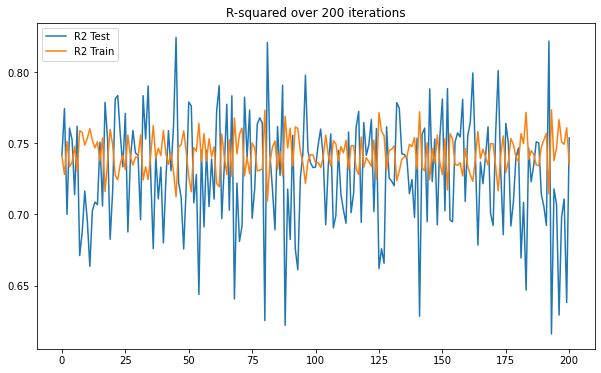

.-------------------------------------------------.
|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: 0.62 | Min:0.71 |  Min: 3.16  |  Min:3.65  |
| Avg: 0.73 | Avg:0.74 |  Avg: 4.04  |  Avg:3.96  |
| Max: 0.82 | Max:0.77 |  Max: 4.88  |  Max:4.23  |
'-------------------------------------------------'
    


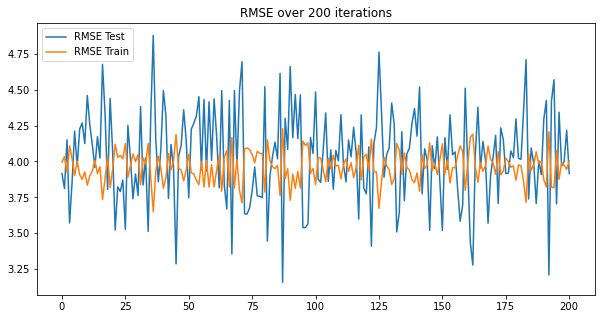

In [5]:
print('Linear Regression With Engineered Features')
run(qt_eng,y,LinearRegression())

This is my most robust model when fed unseen data despite the slightly lower relative scores

Linear Regression With Vanilla Features


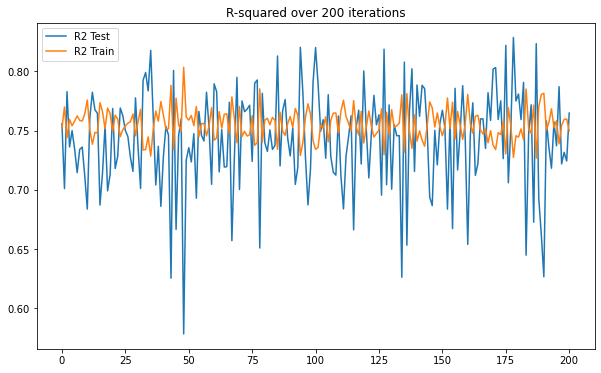

.-------------------------------------------------.
|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: 0.58 | Min:0.73 |  Min: 3.10  |  Min:3.51  |
| Avg: 0.74 | Avg:0.76 |  Avg: 3.93  |  Avg:3.86  |
| Max: 0.83 | Max:0.80 |  Max: 4.81  |  Max:4.11  |
'-------------------------------------------------'
    


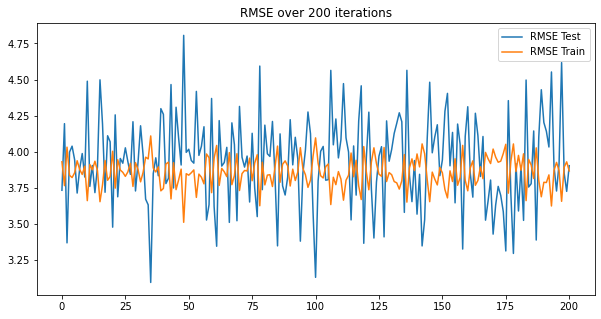

In [6]:
print('Linear Regression With Vanilla Features')
run(qt_str,y,LinearRegression())

The score is about the same as with vanilla features

# Ridge

Ridge With Engineered Features


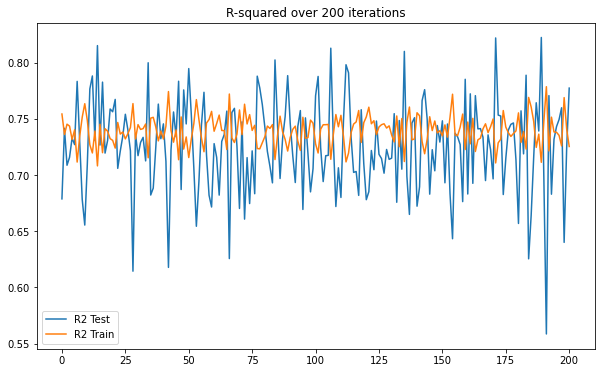

.-------------------------------------------------.
|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: 0.56 | Min:0.71 |  Min: 3.14  |  Min:3.65  |
| Avg: 0.73 | Avg:0.74 |  Avg: 4.03  |  Avg:3.99  |
| Max: 0.82 | Max:0.78 |  Max: 4.92  |  Max:4.25  |
'-------------------------------------------------'
    


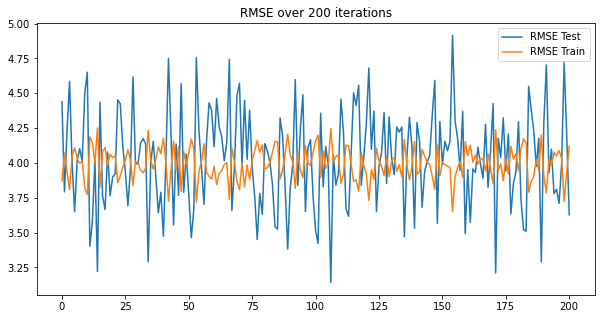

In [7]:
print('Ridge With Engineered Features')
run(qt_eng,y,Ridge())

Ridge performs slightly worse than linear regression

Ridge With Vanilla Features


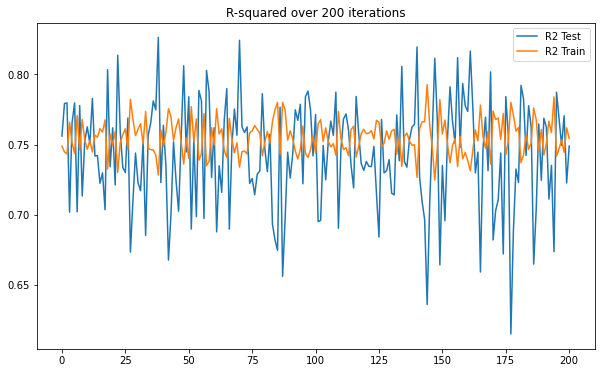

.-------------------------------------------------.
|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: 0.61 | Min:0.72 |  Min: 2.94  |  Min:3.49  |
| Avg: 0.74 | Avg:0.75 |  Avg: 3.92  |  Avg:3.87  |
| Max: 0.83 | Max:0.79 |  Max: 4.90  |  Max:4.15  |
'-------------------------------------------------'
    


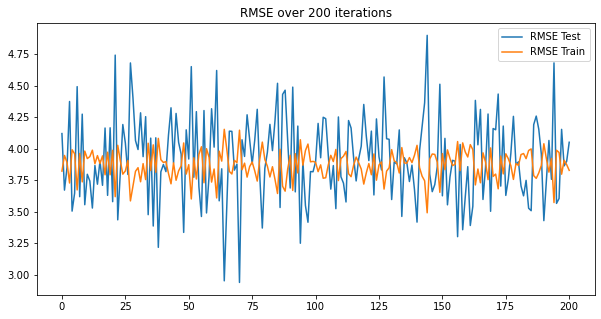

In [8]:
print('Ridge With Vanilla Features')
run(qt_str,y,Ridge())

There is a slight improvement when using vanilla features

# Lasso

Lasso With Engineered Features


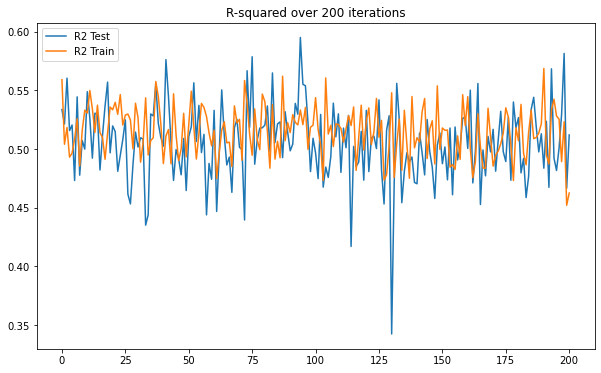

.-------------------------------------------------.
|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: 0.34 | Min:0.45 |  Min: 4.26  |  Min:5.11  |
| Avg: 0.51 | Avg:0.51 |  Avg: 5.49  |  Avg:5.43  |
| Max: 0.60 | Max:0.57 |  Max: 6.58  |  Max:5.64  |
'-------------------------------------------------'
    


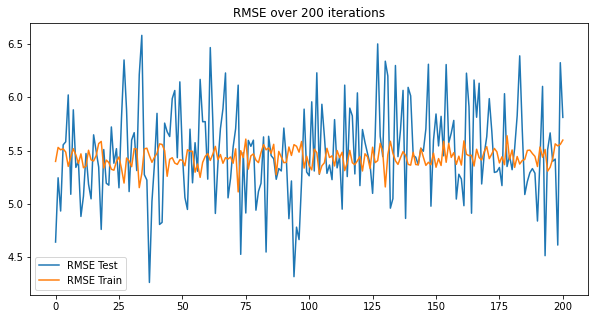

In [9]:
print('Lasso With Engineered Features')
run(qt_eng,y,Lasso())

Lasso peforms even worse

Lasso With Vanilla Features


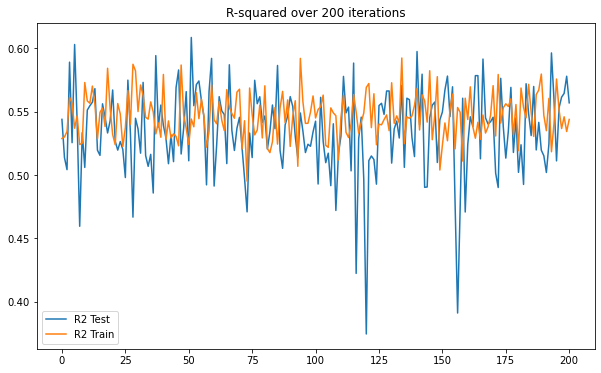

.-------------------------------------------------.
|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: 0.37 | Min:0.50 |  Min: 4.39  |  Min:4.96  |
| Avg: 0.54 | Avg:0.55 |  Avg: 5.29  |  Avg:5.26  |
| Max: 0.61 | Max:0.59 |  Max: 6.64  |  Max:5.48  |
'-------------------------------------------------'
    


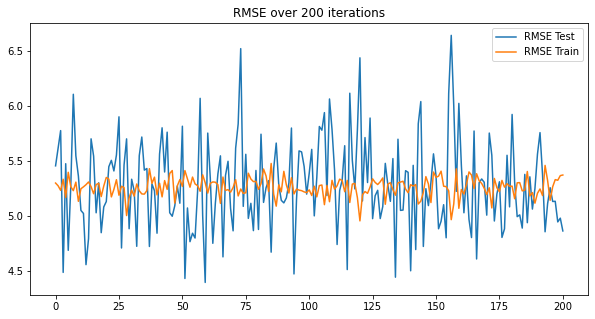

In [10]:
print('Lasso With Vanilla Features')
run(qt_str,y,Lasso())

Again, slightly better numbers with vanilla features

# SVR

LinearSVR With Engineered Features


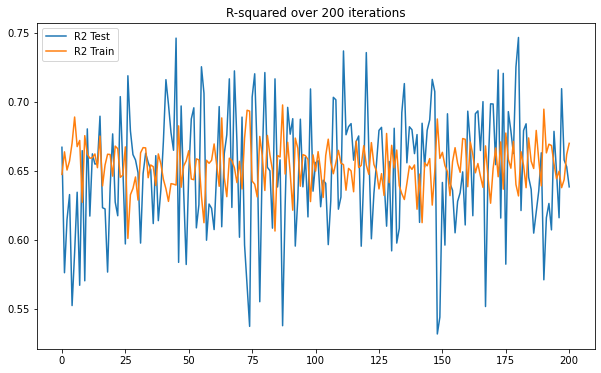

.-------------------------------------------------.
|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: 0.53 | Min:0.60 |  Min: 3.48  |  Min:4.22  |
| Avg: 0.65 | Avg:0.65 |  Avg: 4.59  |  Avg:4.60  |
| Max: 0.75 | Max:0.70 |  Max: 5.68  |  Max:4.85  |
'-------------------------------------------------'
    


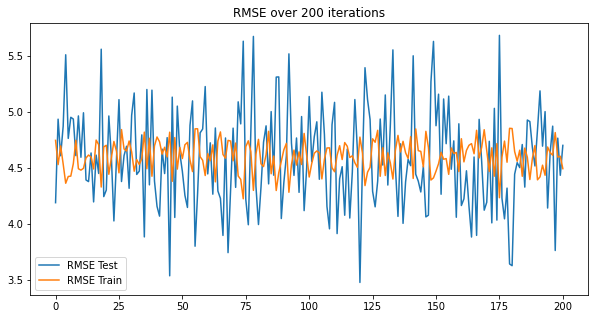

In [11]:
print('LinearSVR With Engineered Features')
run(qt_eng,y,LinearSVR())

SVR brings us back up a bit

LinearSVR With Vanilla Features


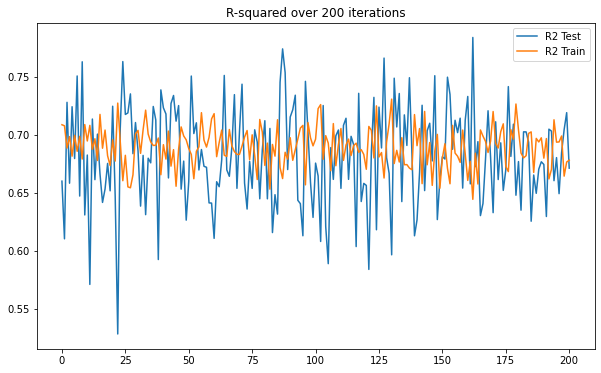

.-------------------------------------------------.
|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: 0.53 | Min:0.64 |  Min: 3.43  |  Min:3.87  |
| Avg: 0.68 | Avg:0.69 |  Avg: 4.39  |  Avg:4.35  |
| Max: 0.78 | Max:0.73 |  Max: 5.91  |  Max:4.70  |
'-------------------------------------------------'
    


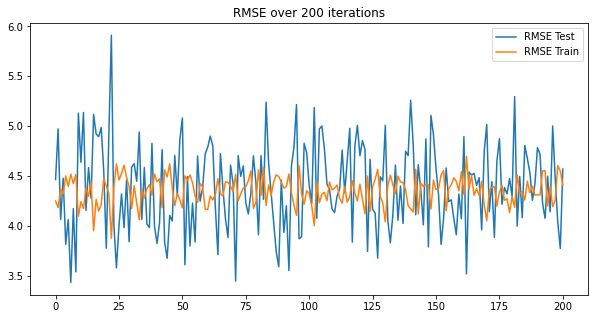

In [12]:
print('LinearSVR With Vanilla Features')
run(qt_str,y,LinearSVR())

And again slightly improved numbers with vanilla features on training data

# KNN

KNeighborsRegressor With Engineered Features


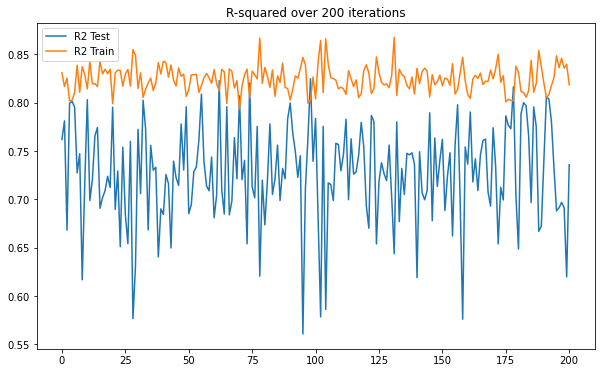

.-------------------------------------------------.
|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: 0.56 | Min:0.79 |  Min: 3.15  |  Min:2.78  |
| Avg: 0.73 | Avg:0.82 |  Avg: 4.03  |  Avg:3.27  |
| Max: 0.82 | Max:0.87 |  Max: 4.99  |  Max:3.53  |
'-------------------------------------------------'
    


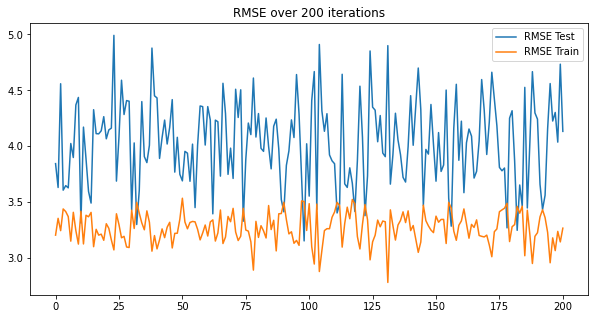

In [13]:
print('KNeighborsRegressor With Engineered Features')
run(qt_eng,y,KNeighborsRegressor())

This one seems to be overfitting a bit on the training data, test data performance is about the same as the rest

KNeighborsRegressor With Vanilla Features


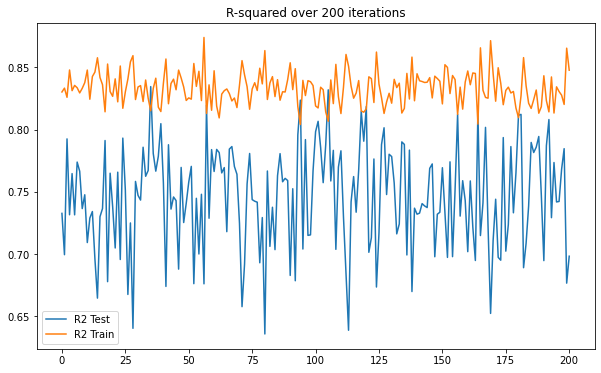

.-------------------------------------------------.
|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: 0.64 | Min:0.80 |  Min: 3.13  |  Min:2.66  |
| Avg: 0.75 | Avg:0.83 |  Avg: 3.91  |  Avg:3.19  |
| Max: 0.83 | Max:0.87 |  Max: 4.90  |  Max:3.45  |
'-------------------------------------------------'
    


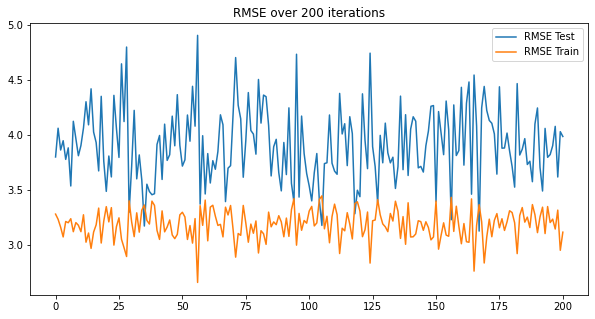

In [14]:
print('KNeighborsRegressor With Vanilla Features')
run(qt_str,y,KNeighborsRegressor())

Nearly identical performance engineered vs vanilla

# Tree

DecisionTreeRegressor With Engineered Features


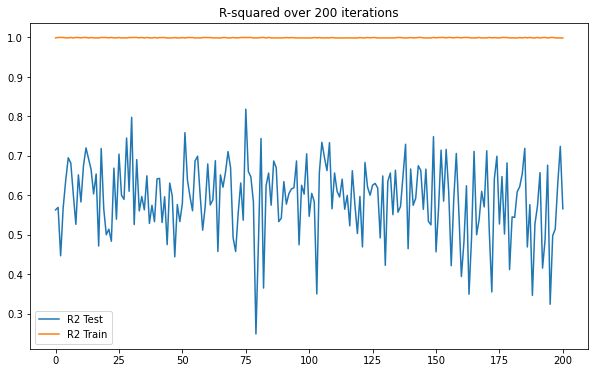

.-------------------------------------------------.
|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: 0.25 | Min:1.00 |  Min: 3.53  |  Min:0.00  |
| Avg: 0.59 | Avg:1.00 |  Avg: 4.94  |  Avg:0.18  |
| Max: 0.82 | Max:1.00 |  Max: 6.49  |  Max:0.28  |
'-------------------------------------------------'
    


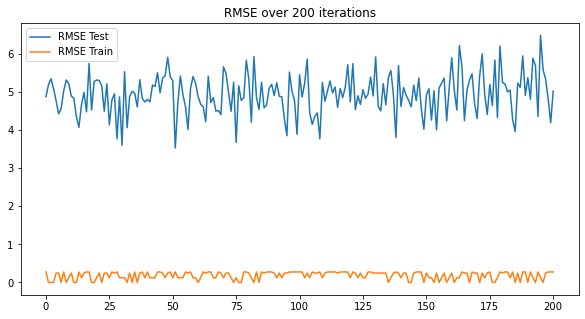

In [15]:
print('DecisionTreeRegressor With Engineered Features')
run(qt_eng,y,DecisionTreeRegressor())

The tree is quite bad

DecisionTreeRegressor With Vanilla Features


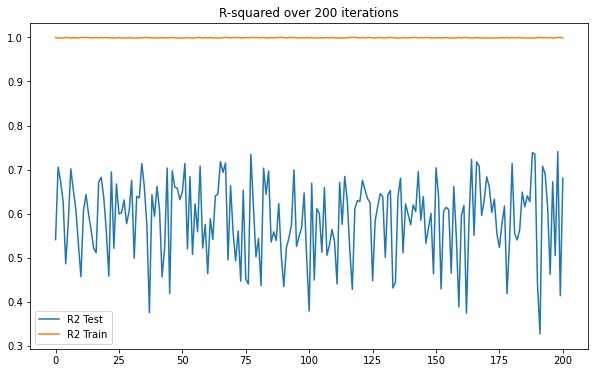

.-------------------------------------------------.
|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: 0.33 | Min:1.00 |  Min: 3.82  |  Min:0.00  |
| Avg: 0.59 | Avg:1.00 |  Avg: 4.96  |  Avg:0.18  |
| Max: 0.74 | Max:1.00 |  Max: 6.42  |  Max:0.28  |
'-------------------------------------------------'
    


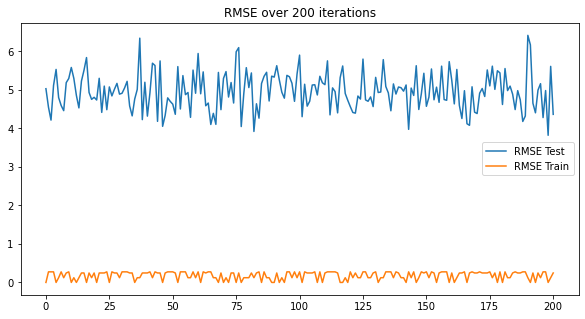

In [16]:
print('DecisionTreeRegressor With Vanilla Features')
run(qt_str,y,DecisionTreeRegressor())

Not quite sure what's going on here but I don't think this one is going to work

# Conclusion

After testing lots of models, scalers, and experimenting with different mixtures of features, I've come to the conclusion that it's futile.

It's cliché, but at under 400 rows I think I can complain about not having enough data.

QuantileTransformer is the heavy lifter and the model really doesn't seem to matter so long as it's linear. In fact, the scores go down as the models get fancier. I think because it's overthinking such a small data set, it's making connections that are coincidental.

The best metric I found was to make predictions on my own vehicles, in other words it's unseen data that I could just pull from nothing. I had used model year as a feature and it seemed to perform quite well until I introduced a 2012, it predicted MPG into the hundreds. I think model year would be a great feature if the data spanned across decades and there was good representation. It could probably even be made categorical as it would be an indicator of tech advancing over decades. All of the vehicles here are more or less in the same "tech era" but the model did seem to find a signal. At any rate it's too unstable if used with data outside the training set.

My personal vehicle predictions are actually quite close. They're a bit on the lower end, but also consider that neither one is even close to being represented in the training data. My truck is a turbo diesel (boost to efficiency) and my car is gas but has some fancy cam phasing and electronic fuel injection. Basically they have higher efficiency compared to anything in the training set.

# Unseen Data

I tried to incorporate my unseen data for predictions into the rewrite for modeling but it didn't work and I'm out of both time and energy and beginning to lose my sanity. So here's the old code to prove it works, first with engineered features:

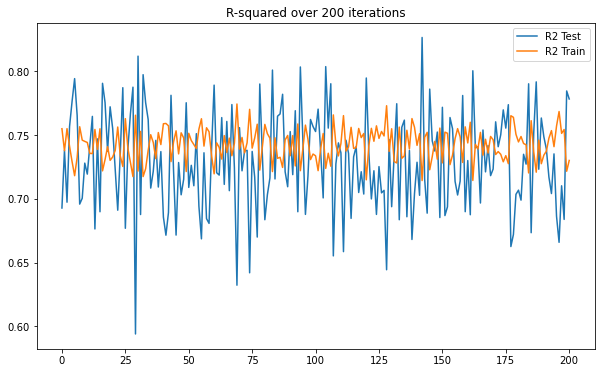

|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: 0.59 | Min:0.71 |  Min: 3.04  |  Min:3.71  |
| Avg: 0.73 | Avg:0.74 |  Avg: 4.04  |  Avg:3.96  |
| Max: 0.83 | Max:0.77 |  Max: 4.72  |  Max:4.27  |



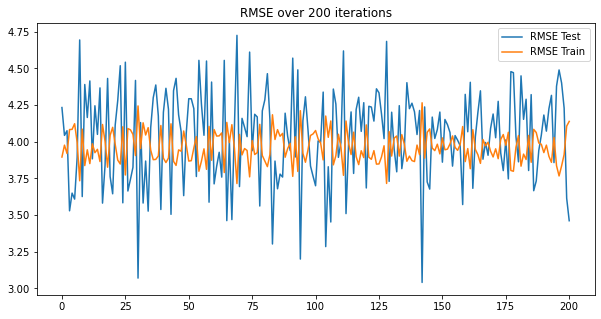

f250 turbo diesel Avg: 13.80
2012 Mustang V8 Avg: 15.80
2022 Honda Grom Avg: 37.12
2011 Chevrolet Suburban Avg: 14.37
2014 Toyota Corolla Avg: 19.17
2004 Mustang V6 Avg: 15.17


In [20]:
X = pd.read_csv('data/X_engineered.csv')
y = pd.read_csv('data/y.csv').mpg

eff = 1

v6_s197_05_hp = 216
v6_s197_05_ci = 245
v6_s197_05_cl = 6
v6_s197_05_weight = 3300
v6_s197_05_eff = (v6_s197_05_hp/\
                  v6_s197_05_ci)*eff
v6_s197_05 = {'horsepower':v6_s197_05_hp,
               'bore_size':v6_s197_05_ci/v6_s197_05_cl,
                  'grunt':(v6_s197_05_ci/v6_s197_05_cl)/v6_s197_05_eff,
                    'load':v6_s197_05_ci/v6_s197_05_weight}
mustang_hp = 400
mustang_ci = 302
mustang_cl = 8
mustang_weight = 3600
mustang_eff = (mustang_hp/\
               mustang_ci)*eff
mustang = {'horsepower':mustang_hp,
            'bore_size':mustang_ci/mustang_cl,
               'grunt':(mustang_ci/mustang_cl)/mustang_eff,
                 'load':mustang_ci/mustang_weight}
corolla_hp = 140
corolla_ci = 110
corolla_cl = 4
corolla_weight = 2800
corolla_eff = (corolla_hp/\
               corolla_ci)*eff
corolla = {'horsepower':corolla_hp,
            'bore_size':corolla_ci/corolla_cl,
               'grunt':(corolla_ci/corolla_cl)/corolla_eff,
                 'load':corolla_ci/corolla_weight}
truck_hp = 500
truck_ci = 359
truck_cl = 6
truck_weight = 6500
truck_eff = (truck_hp/\
             truck_ci)*eff
truck = {'horsepower':truck_hp,
          'bore_size':truck_ci/truck_cl,
             'grunt':(truck_ci/truck_cl)/truck_eff,
               'load':truck_ci/truck_weight}
grom_hp = 12
grom_ci = 7.6
grom_cl = 1
grom_weight = 400
grom_eff = (grom_hp/\
            grom_ci)*eff
grom = {'horsepower':grom_hp,
         'bore_size':grom_ci/grom_cl,
            'grunt':(grom_ci/grom_cl)/grom_eff,
              'load':grom_ci/grom_weight}
burb_hp = 320
burb_ci = 325
burb_cl = 8
burb_weight = 6000
burb_eff = (burb_hp/\
            burb_ci)*eff
burb = {'horsepower':burb_hp,
         'bore_size':burb_ci/burb_cl,
            'grunt':(burb_ci/burb_cl)/burb_eff,
              'load':burb_ci/burb_weight}

mdf = pd.DataFrame(mustang,index=[0])
cdf = pd.DataFrame(corolla,index=[0])
tdf = pd.DataFrame(truck,index=[0])
gdf = pd.DataFrame(grom,index=[0])
bdf = pd.DataFrame(burb,index=[0])
sm5 = pd.DataFrame(v6_s197_05,index=[0])

mustang_predicts = []
corolla_predicts = []
truck_predicts = []
grom_predicts = []
burb_predicts = []
v6_s197_05_predicts = []

r2_test_list = []
r2_train_list = []
rmse_test_list = []
rmse_train_list = []

for i in range(201):
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    pipe = Pipeline([
        # ('minmax', MinMaxScaler()),
        # ('ss', StandardScaler()),
        ('qt', QuantileTransformer(n_quantiles=297)),
        # ('rob', RobustScaler()),
        
        ('linreg', LinearRegression()),
        # ('lasso', Lasso()),
        # ('lassocv', LassoCV()),
        # ('ridge', Ridge()),
        # ('ridgeCV', RidgeCV),
        # ('lsvr', LinearSVR())
    ])

    model = pipe.fit(X_train,y_train)
    test_predict = model.predict(X_test)
    train_predict = model.predict(X_train)

    r2_test = r2_score(y_test, test_predict)
    r2_train = r2_score(y_train, train_predict)
    rmse_test = mean_squared_error(y_test, test_predict ,squared=False)
    rmse_train = mean_squared_error(y_train, train_predict ,squared=False)

    r2_test_list.append(r2_test)
    r2_train_list.append(r2_train)
    rmse_test_list.append(rmse_test)
    rmse_train_list.append(rmse_train)
    truck_predicts.append(model.predict(tdf)[0])
    mustang_predicts.append(model.predict(mdf)[0])
    grom_predicts.append(model.predict(gdf)[0])
    burb_predicts.append(model.predict(bdf)[0])
    corolla_predicts.append(model.predict(cdf)[0])
    v6_s197_05_predicts.append(model.predict(sm5)[0])

plt.subplots(figsize=(10,6))
plt.title('R-squared over 200 iterations')
plt.plot(r2_test_list,label='R2 Test')
plt.plot(r2_train_list,label='R2 Train')
plt.legend()
plt.show();

avg = np.mean
print(f'''|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: {min(r2_test_list):.2f} | Min:{min(r2_train_list):.2f} |  Min: {min(rmse_test_list):.2f}  |  Min:{min(rmse_train_list):.2f}  |
| Avg: {avg(r2_test_list):.2f} | Avg:{avg(r2_train_list):.2f} |  Avg: {avg(rmse_test_list):.2f}  |  Avg:{avg(rmse_train_list):.2f}  |
| Max: {max(r2_test_list):.2f} | Max:{max(r2_train_list):.2f} |  Max: {max(rmse_test_list):.2f}  |  Max:{max(rmse_train_list):.2f}  |
''')
plt.subplots(figsize=(10,5))
plt.title('RMSE over 200 iterations')
plt.plot(rmse_test_list,label='RMSE Test')
plt.plot(rmse_train_list,label='RMSE Train')
plt.legend()
plt.show();

print(f'f250 turbo diesel Avg: {avg(truck_predicts):.2f}')
print(f'2012 Mustang V8 Avg: {avg(mustang_predicts):.2f}')
print(f'2022 Honda Grom Avg: {avg(grom_predicts):.2f}')
print(f'2011 Chevrolet Suburban Avg: {avg(burb_predicts):.2f}')
print(f'2014 Toyota Corolla Avg: {avg(corolla_predicts):.2f}')
print(f'2004 Mustang V6 Avg: {avg(v6_s197_05_predicts):.2f}')

and with straight:

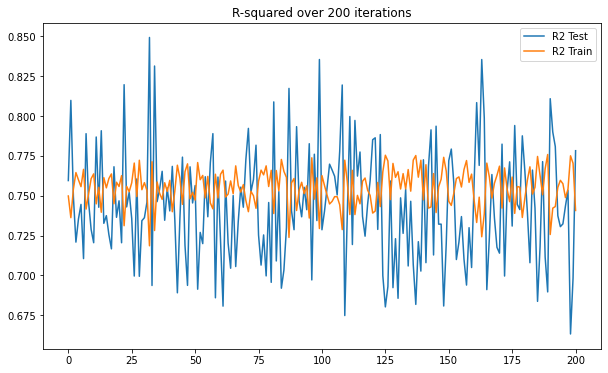

|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: 0.66 | Min:0.72 |  Min: 2.97  |  Min:3.51  |
| Avg: 0.74 | Avg:0.75 |  Avg: 3.93  |  Avg:3.86  |
| Max: 0.85 | Max:0.78 |  Max: 4.99  |  Max:4.13  |



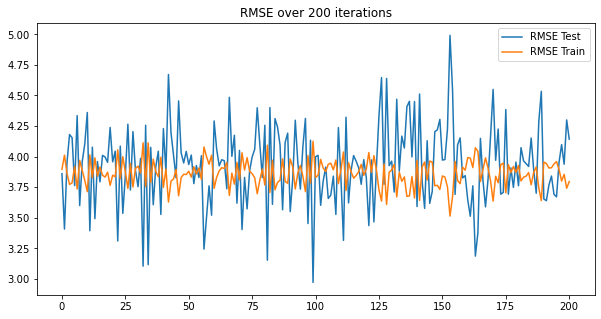

f250 turbo diesel Avg: 11.85
2012 Mustang V8 Avg: 14.84
2022 Honda Grom Avg: 35.66
2011 Chevrolet Suburban Avg: 11.76
2014 Toyota Corolla Avg: 21.13
2004 Mustang V6 Avg: 16.28


In [21]:
X = pd.read_csv('data/X_straight.csv')
y = pd.read_csv('data/y.csv').mpg

v6_s197_05 = {'horsepower':216,
                  'weight':3300,
            'displacement':245,
               'cylinders':6}

mustang = {'horsepower':400,
               'weight':3600,
         'displacement':302,
            'cylinders':8}

corolla = {'horsepower':140,
               'weight':2800,
         'displacement':110,
            'cylinders':4}

truck = {'horsepower':500,
             'weight':6500,
       'displacement':359,
          'cylinders':6}

grom = {'horsepower':12,
            'weight':400,
      'displacement':7.6,
         'cylinders':1}

burb = {'horsepower':320,
            'weight':6000,
      'displacement':325,
         'cylinders':8}

mdf = pd.DataFrame(mustang,index=[0])
cdf = pd.DataFrame(corolla,index=[0])
tdf = pd.DataFrame(truck,index=[0])
gdf = pd.DataFrame(grom,index=[0])
bdf = pd.DataFrame(burb,index=[0])
sm5 = pd.DataFrame(v6_s197_05,index=[0])

mustang_predicts = []
corolla_predicts = []
truck_predicts = []
grom_predicts = []
burb_predicts = []
v6_s197_05_predicts = []

r2_test_list = []
r2_train_list = []
rmse_test_list = []
rmse_train_list = []

for i in range(201):
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    pipe = Pipeline([
        # ('minmax', MinMaxScaler()),
        # ('ss', StandardScaler()),
        ('qt', QuantileTransformer(n_quantiles=297)),
        # ('rob', RobustScaler()),
        
        ('linreg', LinearRegression()),
        # ('lasso', Lasso()),
        # ('lassocv', LassoCV()),
        # ('ridge', Ridge()),
        # ('ridgeCV', RidgeCV),
        # ('lsvr', LinearSVR())
    ])

    model = pipe.fit(X_train,y_train)
    test_predict = model.predict(X_test)
    train_predict = model.predict(X_train)

    r2_test = r2_score(y_test, test_predict)
    r2_train = r2_score(y_train, train_predict)
    rmse_test = mean_squared_error(y_test, test_predict ,squared=False)
    rmse_train = mean_squared_error(y_train, train_predict ,squared=False)

    r2_test_list.append(r2_test)
    r2_train_list.append(r2_train)
    rmse_test_list.append(rmse_test)
    rmse_train_list.append(rmse_train)
    truck_predicts.append(model.predict(tdf)[0])
    mustang_predicts.append(model.predict(mdf)[0])
    grom_predicts.append(model.predict(gdf)[0])
    burb_predicts.append(model.predict(bdf)[0])
    corolla_predicts.append(model.predict(cdf)[0])
    v6_s197_05_predicts.append(model.predict(sm5)[0])

plt.subplots(figsize=(10,6))
plt.title('R-squared over 200 iterations')
plt.plot(r2_test_list,label='R2 Test')
plt.plot(r2_train_list,label='R2 Train')
plt.legend()
plt.show();

avg = np.mean
print(f'''|  R2 Test  | R2 Train |  RMSE Test  | RMSE Train |
|-----------|----------|-------------|------------|
| Min: {min(r2_test_list):.2f} | Min:{min(r2_train_list):.2f} |  Min: {min(rmse_test_list):.2f}  |  Min:{min(rmse_train_list):.2f}  |
| Avg: {avg(r2_test_list):.2f} | Avg:{avg(r2_train_list):.2f} |  Avg: {avg(rmse_test_list):.2f}  |  Avg:{avg(rmse_train_list):.2f}  |
| Max: {max(r2_test_list):.2f} | Max:{max(r2_train_list):.2f} |  Max: {max(rmse_test_list):.2f}  |  Max:{max(rmse_train_list):.2f}  |
''')
plt.subplots(figsize=(10,5))
plt.title('RMSE over 200 iterations')
plt.plot(rmse_test_list,label='RMSE Test')
plt.plot(rmse_train_list,label='RMSE Train')
plt.legend()
plt.show();

print(f'f250 turbo diesel Avg: {avg(truck_predicts):.2f}')
print(f'2012 Mustang V8 Avg: {avg(mustang_predicts):.2f}')
print(f'2022 Honda Grom Avg: {avg(grom_predicts):.2f}')
print(f'2011 Chevrolet Suburban Avg: {avg(burb_predicts):.2f}')
print(f'2014 Toyota Corolla Avg: {avg(corolla_predicts):.2f}')
print(f'2004 Mustang V6 Avg: {avg(v6_s197_05_predicts):.2f}')

Predictions are low but relative to each other make sense. For instance they all rank as they should, first the trucks, then the Mustangs, then the Corolla ahead by a decent amount, and then the Grom way out ahead.

There is no real signal of technology here, I would like to get some more data into the future to use model_year as a feature, it gave a nice boost to the scores but when given a 2000s vehicle after being trained on 70s data it predicted MPG around 600 or so.

Each of these predictions should be scaled up by about 30-40% with the exception of the Grom which should be around like 120MPG at least. But the grom is so far off from anything in the training set that I can't complain too much